*It is advised not to run them on Jupyter Notebook for a better experience*

# Game 1

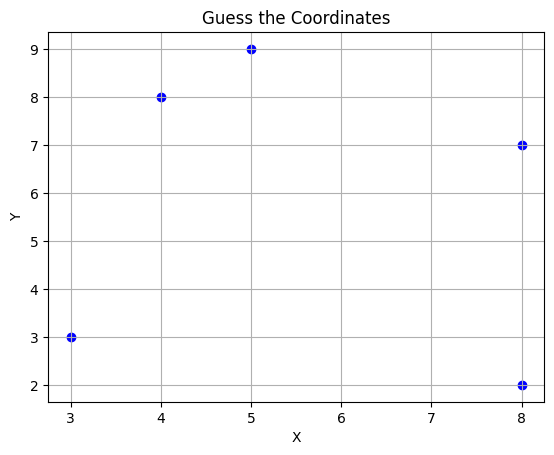

Welcome to the Scatter Plot Game!
Try to guess the coordinates of the points on the graph.
Enter 'q' to quit.
Incorrect. Try a lower value for X and a higher value for Y.
Incorrect. Try a lower value for X and a higher value for Y.
Incorrect. Try a higher value for X and a lower value for Y.
Incorrect. Try a lower value for X and a higher value for Y.


ValueError: invalid literal for int() with base 10: ''

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_points(num_points, xlim, ylim):
    x = np.random.randint(*xlim, size=num_points)
    y = np.random.randint(*ylim, size=num_points)
    return x, y

def plot_points(x, y):
    plt.scatter(x, y, color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Guess the Coordinates')
    plt.grid(True)
    plt.show()

def play_game(num_points, xlim, ylim):
    x, y = generate_points(num_points, xlim, ylim)
    plot_points(x, y)
    print("Welcome to the Scatter Plot Game!")
    print("Try to guess the coordinates of the points on the graph.")
    print("Enter 'q' to quit.")

    for i in range(num_points):
        guess_x = input(f"Enter your guess for X coordinate of point {i + 1}: ")
        if guess_x.lower() == 'q':
            print("Exiting the game...")
            return
        guess_y = input(f"Enter your guess for Y coordinate of point {i + 1}: ")
        if guess_y.lower() == 'q':
            print("Exiting the game...")
            return
        
        guess_x = int(guess_x)
        guess_y = int(guess_y)
        
        if guess_x == x[i] and guess_y == y[i]:
            print("Correct!")
        else:
            hint_x = "higher" if guess_x < x[i] else "lower"
            hint_y = "higher" if guess_y < y[i] else "lower"
            print(f"Incorrect. Try a {hint_x} value for X and a {hint_y} value for Y.")

if __name__ == "__main__":
    num_points = 5  # Change the number of points as desired
    xlim = (0, 10)  # Change the x-axis limits as desired
    ylim = (0, 10)  # Change the y-axis limits as desired
    play_game(num_points, xlim, ylim)


# Game 2

In [5]:
import random

def generate_problem():
    a = random.randint(-100, 100)
    b = random.randint(-100, 100)
    c = random.randint(-100, 100)
    operator = random.choice(['+', '-', '*', '/'])
    
    if operator == '+':
        problem = f"{a} + {b}"
        answer = a + b
    elif operator == '-':
        problem = f"{a} - {b}"
        answer = a - b
    elif operator == '*':
        problem = f"{a} * {b}"
        answer = a * b
    else:
        # Avoid division by zero
        if b == 0:
            b = random.randint(-100, 100)
        problem = f"{a} / {b}"
        answer = a / b
    
    return problem, answer

def main():
    print("Welcome to the Algebra Practice Game!")
    print("Solve the following equations:")
    
    score = 0
    num_problems = 5
    
    for i in range(num_problems):
        problem, answer = generate_problem()
        print(f"Question {i+1}: What is the answer to {problem} ?")
        user_answer = input("Your answer: ")
        
        try:
            user_answer = float(user_answer)
            if user_answer == answer:
                print("Correct!")
                score += 1
            else:
                print("Incorrect!")
        except ValueError:
            print("Invalid input. Please enter a number.")
    
    print(f"\nYour final score is: {score}/{num_problems}")

if __name__ == "__main__":
    main()


Welcome to the Algebra Practice Game!
Solve the following equations:
Question 1: What is the answer to -68 + 63 ?
Invalid input. Please enter a number.
Question 2: What is the answer to -23 - -57 ?
Invalid input. Please enter a number.
Question 3: What is the answer to -93 + -4 ?
Invalid input. Please enter a number.
Question 4: What is the answer to 57 - 17 ?
Invalid input. Please enter a number.
Question 5: What is the answer to -13 * -67 ?
Invalid input. Please enter a number.

Your final score is: 0/5


# Game 3

In [ ]:
import pygame
import sys
import math
import random

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 800, 600
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)

# Function to draw the wall
def draw_wall(surface, x, height):
    pygame.draw.rect(surface, BLACK, (x, 0, 20, height))
    pygame.draw.rect(surface, BLACK, (x, height + 200, 20, HEIGHT - height - 200))

# Function to calculate projectile motion
def calculate_projectile(start_pos, angle, velocity):
    g = 9.81  # acceleration due to gravity
    radians = math.radians(angle)
    time_of_flight = (2 * velocity * math.sin(radians)) / g
    max_height = (velocity ** 2 * (math.sin(radians) ** 2)) / (2 * g)
    distance = velocity * math.cos(radians) * time_of_flight
    return max_height, distance

# Function to check if projectile clears the wall
def clear_wall(wall_x, wall_height, projectile_height, distance):
    return distance >= wall_x and projectile_height <= wall_height

# Generate random wall height and position
wall_height = random.randint(100, 400)
wall_x = random.randint(200, 600)

# Set up Pygame display
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Projectile Game")

# Main game loop
running = True
angle = 45
velocity = 50
while running:
    screen.fill(WHITE)

    # Draw wall
    draw_wall(screen, wall_x, wall_height)

    # Draw projectile
    max_height, distance = calculate_projectile((100, HEIGHT - 100), angle, velocity)
    pygame.draw.circle(screen, GREEN, (int(distance), HEIGHT - int(max_height)), 10)

    # Check if projectile clears the wall
    cleared = clear_wall(wall_x, wall_height, max_height, distance)

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                angle += 1
            elif event.key == pygame.K_DOWN:
                angle -= 1
            elif event.key == pygame.K_RIGHT:
                velocity += 1
            elif event.key == pygame.K_LEFT:
                velocity -= 1

    # Display message if the wall is cleared
    if cleared:
        font = pygame.font.SysFont(None, 36)
        text = font.render("Wall Cleared!", True, BLACK)
        screen.blit(text, (WIDTH // 2 - text.get_width() // 2, HEIGHT // 2 - text.get_height() // 2))

    pygame.display.flip()

pygame.quit()
sys.exit()
